# Module 3- Regression & Beta Calculation



### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [59]:
import pandas as pd

In [60]:
g_data = pd.read_csv(r"GOLD.csv")

In [61]:
g_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [62]:
gold_v2 = g_data.dropna()
gold_v2

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
406,"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
407,"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
408,"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186
409,"Dec 07, 2018",31440,31011,31480,30941,11.24K,1.40%,669.0,976.692705


In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
Y = gold_v2['Pred']
X = gold_v2['new']

In [83]:
Y = np.array(gold_v2["Pred"])
X = np.array(gold_v2["new"])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [84]:
reg_model = LinearRegression()
reg_model.fit(X, Y)
y_predicted = reg_model.predict(X)
rms_value = mean_squared_error(Y, y_predicted)
r2 = r2_score(Y, y_predicted)

Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


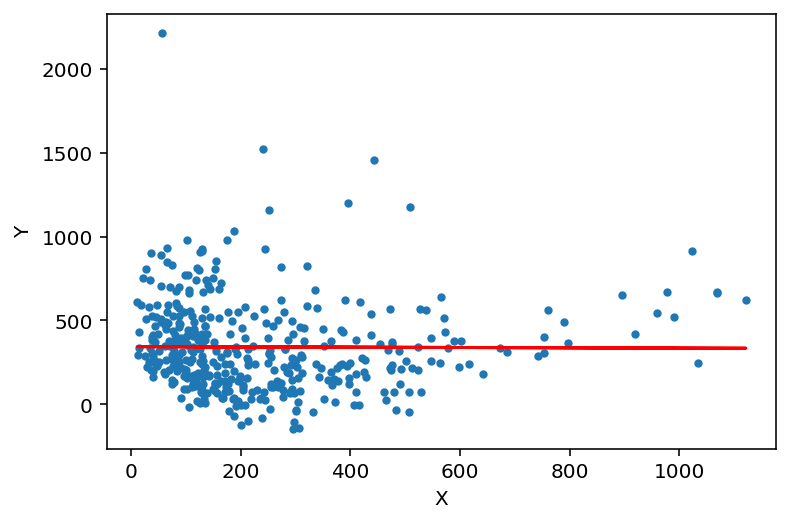

In [85]:
print('Slope:' ,reg_model.coef_)
print('Intercept:', reg_model.intercept_)
print('Root mean squared error: ', rms_value)
print('R2 score: ', r2)
plt.scatter(X, Y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, y_predicted, color='r')
plt.show()

In [86]:
pre_data = g_data[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
g_data['Pred'] = sata
g_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,343.272194,48.365693


In [87]:
Y = np.array(g_data["new"])
X = np.array(g_data["Pred"])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [88]:
reg_model = LinearRegression()
reg_model.fit(X, Y)
y_predicted = reg_model.predict(X)
rms_value = mean_squared_error(Y, y_predicted)
r2 = r2_score(Y, y_predicted)

Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  6.5108051116976104e-24
R2 score:  1.0


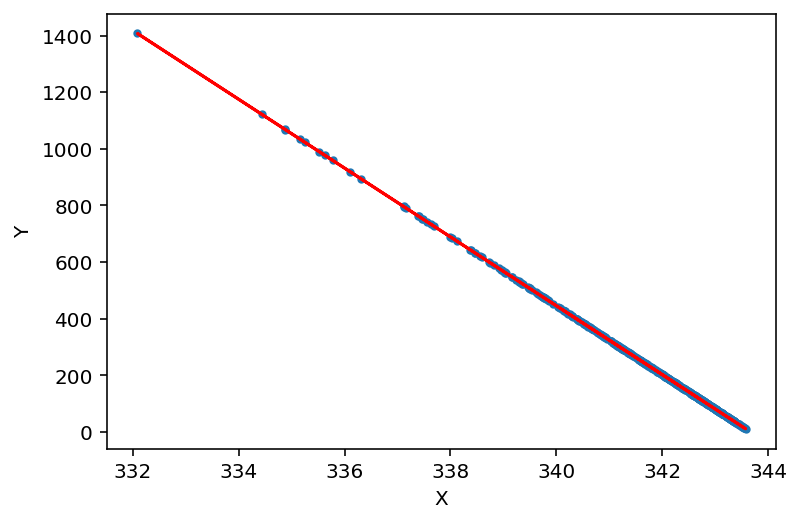

In [89]:
print('Slope:' ,reg_model.coef_)
print('Intercept:', reg_model.intercept_)
print('Root mean squared error: ', rms_value)
print('R2 score: ', r2)
plt.scatter(X, Y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, y_predicted, color='r')
plt.show()

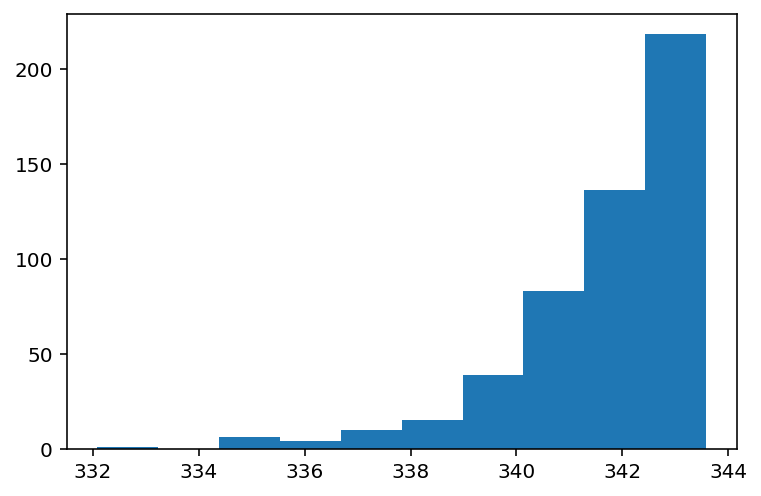

In [90]:
import matplotlib.pyplot as plt

plt.hist(g_data['Pred'])
plt.show()

### Query 3.2
Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -

>The daily Beta value for the past 3 months. (Daily= Daily returns)

>The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.
Attempt the question using regression.(Regression Reference).
Were the Beta values more or less than 1 ? What if it was negative ?
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results 

In [91]:
RAYMOND_data = pd.read_csv('RAYMOND.csv')
RAYMOND_data['Date'] = pd.to_datetime(RAYMOND_data['Date'])
RAYMOND_data = RAYMOND_data.sort_values('Date')
RAYMOND_data.set_index('Date', inplace=True)
RAYMOND_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,RAYMOND,EQ,763.45,765.00,779.00,757.05,773.90,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
2017-05-16,RAYMOND,EQ,772.80,773.45,801.45,768.10,783.50,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2017-05-17,RAYMOND,EQ,785.00,786.00,804.95,778.40,785.50,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
2017-05-18,RAYMOND,EQ,783.65,779.35,779.95,740.20,744.00,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
2017-05-19,RAYMOND,EQ,746.95,748.00,767.50,714.00,722.00,723.10,740.30,561346,4.155619e+08,13328,137648,24.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RAYMOND,EQ,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78
2019-05-08,RAYMOND,EQ,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52
2019-05-09,RAYMOND,EQ,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15


In [92]:
nifty_data = pd.read_csv('Nifty50.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [93]:
fil_RAYMOND = RAYMOND_data[405:]
fil_nifty = nifty_data[405:]

In [94]:
return_RAYMOND = fil_RAYMOND['Close Price'].pct_change()
return_nifty = fil_nifty['Close'].pct_change()

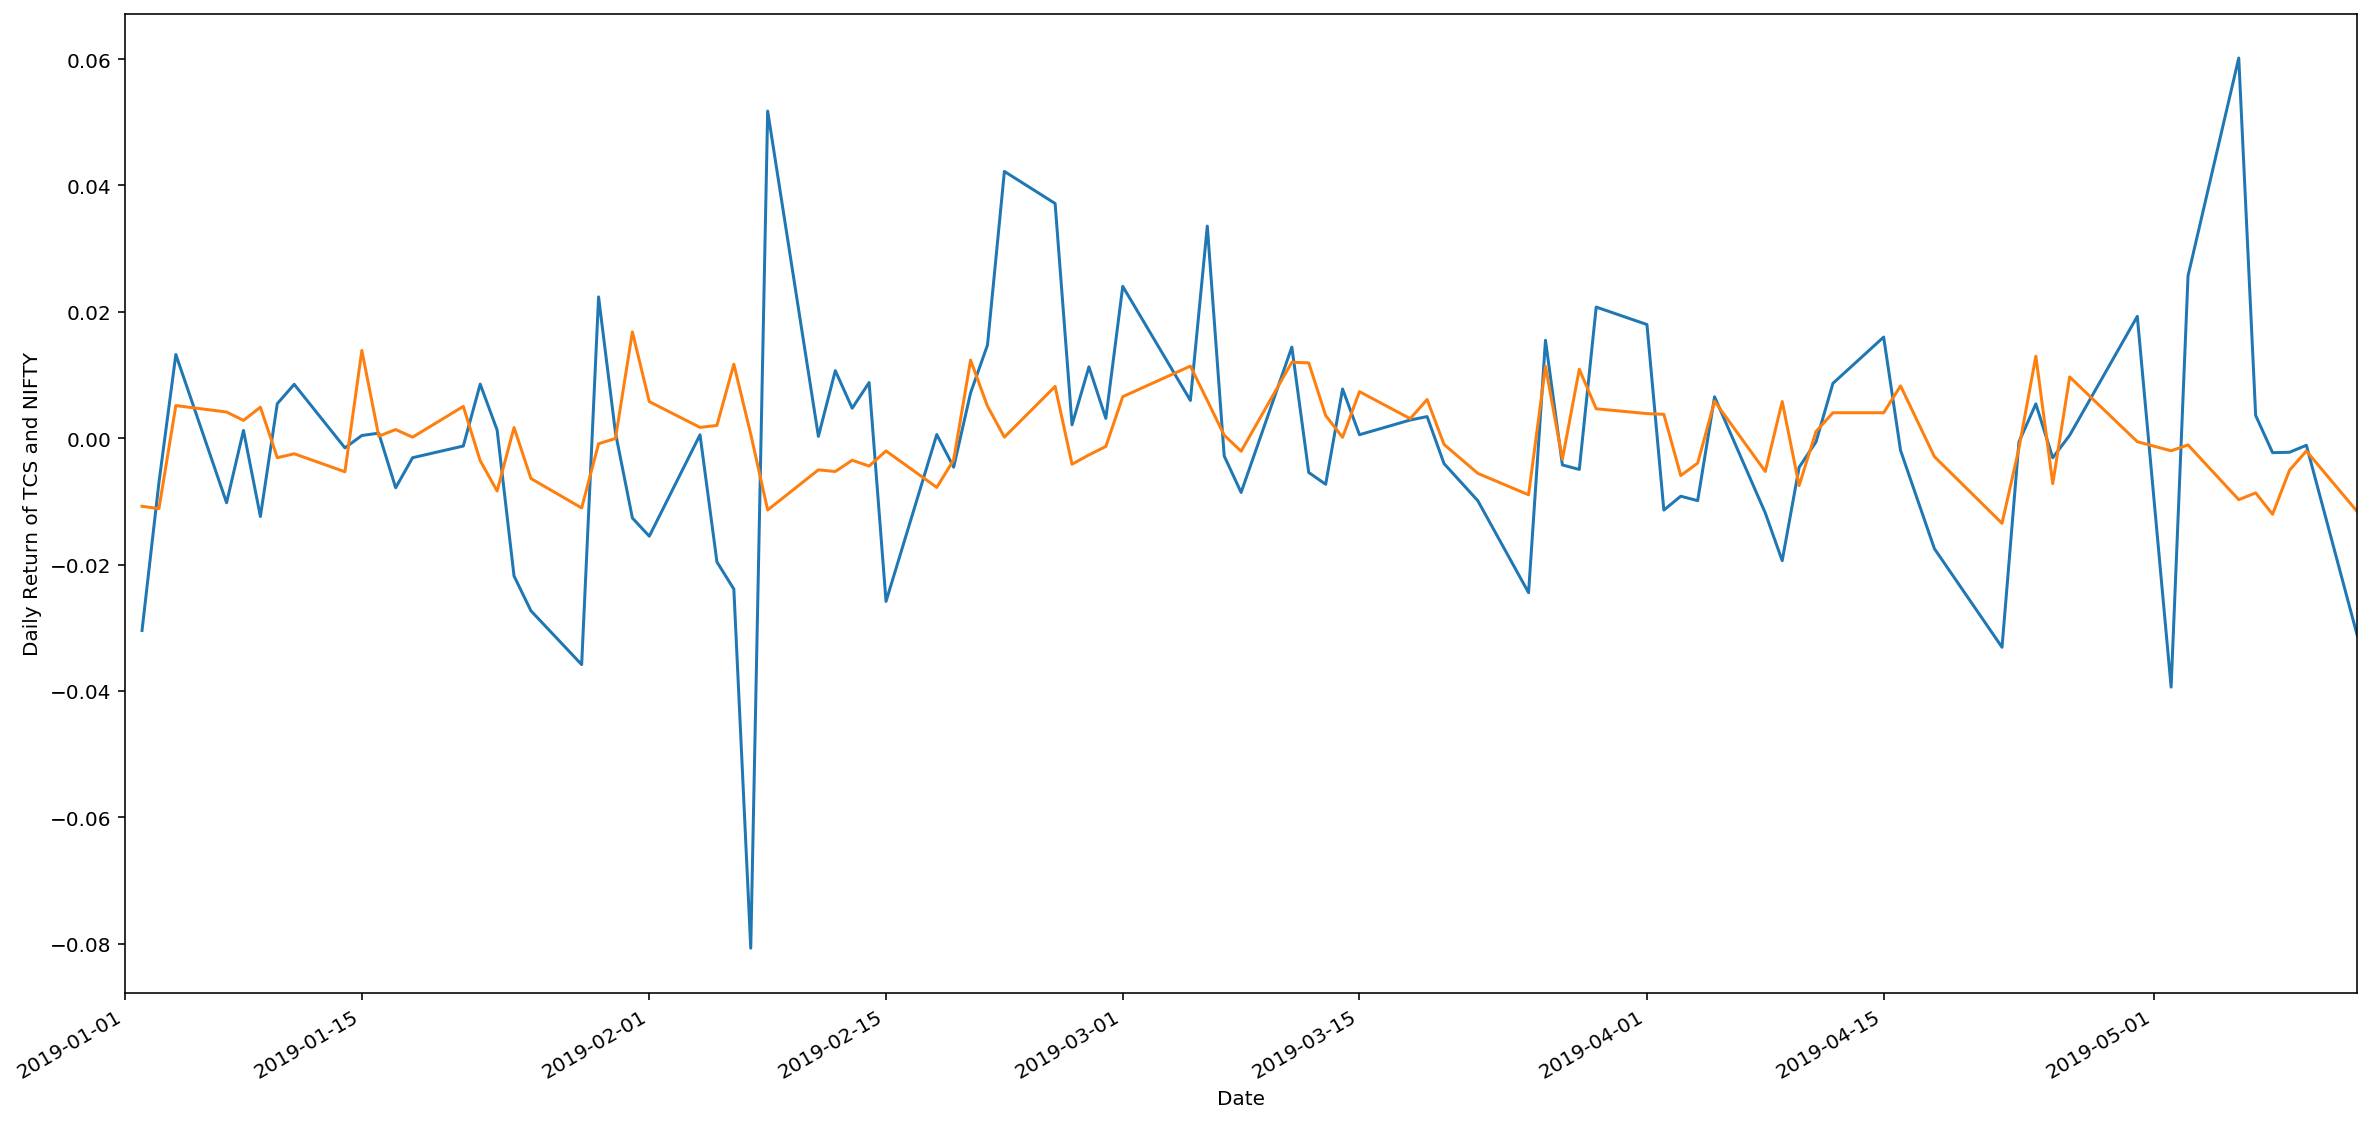

In [95]:
plt.figure(figsize=(20,10))
return_RAYMOND.plot()
return_nifty.plot()
plt.ylabel("Daily Return of TCS and NIFTY")
plt.show()

In [96]:
fil_RAYMOND['pct_change'] = fil_RAYMOND['Close Price'].pct_change()
fil_nifty['pct_change'] = fil_nifty['Close'].pct_change()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
X = fil_RAYMOND['pct_change'].dropna()
Y = fil_nifty['pct_change'].dropna()

In [99]:
import pandas as pd 
import statsmodels.api as sm

myModel = sm.OLS(Y,X).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_change   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              1.715
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                       0.194
Time:                        01:29:16   Log-Likelihood:                          313.96
No. Observations:                  88   AIC:                                     -625.9
Df Residuals:                      87   BIC:                                     -623.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.0491      0.038      1.309      0.194      -0.025       0.124
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.339
Skew:                           0.186   Prob(JB):                        0.512
Kurtosis:                       2.524   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
import pandas as pd
import statsmodels.api as sm

RAYMOND = pd.read_csv('RAYMOND.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('Nifty50.csv', parse_dates=True, index_col='Date')

monthly_prices = pd.concat([RAYMOND['Close Price'], nifty50['Close']], axis=1)
monthly_prices.columns = ['RAYMOND', 'NIFTY50']

print(monthly_prices.head())

monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)
print(clean_monthly_returns.head())

            RAYMOND  NIFTY50
Date                        
2017-05-15   772.80  9445.40
2017-05-16   785.00  9512.25
2017-05-17   783.65  9525.75
2017-05-18   746.95  9429.45
2017-05-19   723.10  9427.90
             RAYMOND   NIFTY50
Date                          
2017-05-16  0.015787  0.007078
2017-05-17 -0.001720  0.001419
2017-05-18 -0.046832 -0.010109
2017-05-19 -0.031930 -0.000164
2017-05-22 -0.009888  0.001098


In [101]:
X = clean_monthly_returns['RAYMOND']
y = clean_monthly_returns['NIFTY50']

X1 = sm.add_constant(X)
model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     118.4
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           7.64e-25
Time:                        01:29:30   Log-Likelihood:                 1786.1
No. Observations:                 493   AIC:                            -3568.
Df Residuals:                     491   BIC:                            -3560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.110      0.2

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
